# グリッドサーチ：1パラメータのロジスティック回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/Users/ken.nakano/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [6]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97368421052631582

In [8]:
clf.C =  10
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99122807017543857

In [9]:
clf.C =  100
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [10]:
C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10]

In [11]:
scores = []

for C in C_range:
    clf.C = C
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    
scores

[0.85087719298245612,
 0.8771929824561403,
 0.92982456140350878,
 0.97368421052631582,
 1.0,
 0.93859649122807021,
 0.92982456140350878]

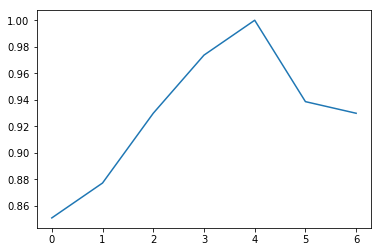

In [12]:
plt.plot(scores)

In [13]:
# C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10] # 普通は↓のような書き方する
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp

In [14]:
from sklearn.grid_search import GridSearchCV

/Users/ken.nakano/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
param = {'C':C_range}

gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [16]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0},
 0.9648351648351648,
 LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [17]:
gs.score(X_test, y_test)

0.99122807017543857

In [18]:
# 同じ結果がでるはず
clf_best = gs.best_estimator_
clf_best.score(X_test, y_test)

0.99122807017543857

# グリッドサーチ：2パラメータのSVM

In [19]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 5.0)
C_range = 10 ** C_range_exp

In [20]:
param = {'C':C_range, 'kernel':['linear', 'rbf']}

In [21]:
gs = GridSearchCV(clf, param, n_jobs=1, verbose=2)

In [22]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..................................... C=0.01, kernel=rbf -   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..................................... C=0.01, kernel=rbf -   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..................................... C=0.01, kernel=rbf -   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... C=100.0, kernel=rbf -   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] ................................ C=1000.0, kernel=linear -   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] ................................ C=1000.0, kernel=linear -   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] ................................ C=1000.0, kernel=linear -   0.0s
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................................... C=1000.0, kernel=rbf -   0.0s
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................................... C=1000.0, kernel=rbf -   0.0s
[CV] C=1000.0, kernel=rbf ............................................
[CV] ................................... C=1000.0, kernel=rbf -   0.0s
[CV] C=10000.0, kernel=linear ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [23]:
gs.best_params_, gs.best_score_ , gs.best_estimator_

({'C': 1.0, 'kernel': 'linear'},
 0.9692307692307692,
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [24]:
SVC(kernel='rbf').gamma

'auto'

# グリッドサーチ：3パラメータのSVM

In [25]:
clf = SVC()

In [26]:
C_range_exp = np.arange(-2.0, 10.0)
C_range = 10 ** C_range_exp

gamma_range_exp = np.arange(-10.0, 0.0, 3)
gamma_range = 10 ** gamma_range_exp

param = [
    {'C':C_range, 'kernel':['linear']}, # linearカーネルにはgammaがない
    {'C':C_range, 'kernel':['rbf'], 'gamma':gamma_range}
]

In [27]:
gs = GridSearchCV(clf, param, n_jobs=1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................................. C=0.01, kernel=linear -   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................................... C=0.1, kernel=linear -   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................................... C=0.1, kernel=linear -   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................................... C=0.1, kernel=linear -   0.0s
[CV] C=1.0, kernel=linear ............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=10.0, kernel=linear -   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] .................................. C=10.0, kernel=linear -   0.0s
[CV] C=100.0, kernel=linear ..........................................
[CV] ................................. C=100.0, kernel=linear -   0.0s
[CV] C=100.0, kernel=linear ..........................................
[CV] ................................. C=100.0, kernel=linear -   0.0s
[CV] C=100.0, kernel=linear ..........................................
[CV] ................................. C=100.0, kernel=linear -   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] ................................ C=1000.0, kernel=linear -   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] ................................ C=1000.0, kernel=linear -   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09]), 'kernel': ['linear']}, {'gamma': array([  1.00000e-10,   1.00000e-07,   1.00000....00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09]), 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [28]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 1000000000.0, 'gamma': 9.9999999999999995e-08, 'kernel': 'rbf'},
 0.978021978021978,
 SVC(C=1000000000.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=9.9999999999999995e-08,
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False))

# グリッドサーチ：kNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [30]:
param = {'n_neighbors' : np.arange(1, 20)}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [31]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'n_neighbors': 5},
 0.9714285714285714,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'))

In [32]:
gs.score(X_test, y_test)

0.96491228070175439

# ランダムサーチ：多層パーセプトロン(MLP)

In [33]:
import sklearn
sklearn.__version__

'0.18.1'

In [36]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 2000)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
param = {'hidden_layer_sizes' : [
        (10,),(50,),(100,),
        (10,10,),(50,50,),(100,100,),
        (10,5,),(5,5,),(30,20,10,),
        (100,1000,50,),(1000,100,50,),
        (10,10,10,),(50,50,50,),(100,100,100,)
    ],
         'activation' : ['identity', 'logistic', 'tanh', 'relu'],
         'beta_1':[0.9,0.8,0.7,0.6,0.5],
         'beta_2':[0.999,0.9,0.8,0.7],
         'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,1]
}

In [38]:
# gs = GridSearchCV(clf, param, n_jobs=1, verbose=1)
# これはパラメータが多すぎる…

In [39]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(clf, param, n_iter=20, n_jobs=1, verbose=2)
# ランダムに幾つか試してsearchする

In [40]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] hidden_layer_sizes=(100,), activation=relu, alpha=0.1, beta_1=0.6, beta_2=0.8 
[CV]  hidden_layer_sizes=(100,), activation=relu, alpha=0.1, beta_1=0.6, beta_2=0.8, total=   0.5s
[CV] hidden_layer_sizes=(100,), activation=relu, alpha=0.1, beta_1=0.6, beta_2=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  hidden_layer_sizes=(100,), activation=relu, alpha=0.1, beta_1=0.6, beta_2=0.8, total=   0.5s
[CV] hidden_layer_sizes=(100,), activation=relu, alpha=0.1, beta_1=0.6, beta_2=0.8 
[CV]  hidden_layer_sizes=(100,), activation=relu, alpha=0.1, beta_1=0.6, beta_2=0.8, total=   0.5s
[CV] hidden_layer_sizes=(100, 1000, 50), activation=tanh, alpha=0.01, beta_1=0.6, beta_2=0.9 
[CV]  hidden_layer_sizes=(100, 1000, 50), activation=tanh, alpha=0.01, beta_1=0.6, beta_2=0.9, total=   0.7s
[CV] hidden_layer_sizes=(100, 1000, 50), activation=tanh, alpha=0.01, beta_1=0.6, beta_2=0.9 
[CV]  hidden_layer_sizes=(100, 1000, 50), activation=tanh, alpha=0.01, beta_1=0.6, beta_2=0.9, total=   0.5s
[CV] hidden_layer_sizes=(100, 1000, 50), activation=tanh, alpha=0.01, beta_1=0.6, beta_2=0.9 
[CV]  hidden_layer_sizes=(100, 1000, 50), activation=tanh, alpha=0.01, beta_1=0.6, beta_2=0.9, total=   1.0s
[CV] hidden_layer_sizes=(100,), activation=identity, alpha=0.0001, beta_1=0.7, beta_2=0.8 
[CV]  hidden_layer

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   39.8s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100), (10, 5), (5, 5), (30, 20, 10), (100, 1000, 50), (1000, 100, 50), (10, 10, 10), (50, 50, 50), (100, 100, 100)], 'beta_2': [0.999, 0.9, 0.8, 0.7], 'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'activation': ['identity', 'logistic', 'tanh', 'relu']},
          pre_dispatch='2*n_jobs', random_sta

In [41]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'activation': 'tanh',
  'alpha': 1,
  'beta_1': 0.9,
  'beta_2': 0.999,
  'hidden_layer_sizes': (30, 20, 10)},
 0.97142857142857142,
 MLPClassifier(activation='tanh', alpha=1, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(30, 20, 10), learning_rate='constant',
        learning_rate_init=0.001, max_iter=2000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False))

In [42]:
gs.score(X_test, y_test)

0.98245614035087714

# パイプライン：PCAとロジスティック回帰を一緒に

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [46]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)

In [47]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [49]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [51]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96491228070175439

In [53]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.97368421052631582

In [54]:
## whiteningしない場合にどうなるか？
from sklearn.pipeline import Pipeline

estimators = [
    ('pca', PCA(whiten=True)),
    ('clf',   LogisticRegression())
]

pipe = Pipeline(estimators)

In [55]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.97368421052631582

# パイプライン：スケーリングとSVMを一緒に

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

estimators = [
    ('mms', MinMaxScaler()),
    ('clf',   SVC(kernel='rbf', C=1e10))
]

pipe = Pipeline(estimators)

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [59]:
pipe.score(X_test, y_test)

0.97368421052631582

# パイプライン：前処理もグリッドサーチで

In [60]:
estimators = [
    ('pca', PCA(whiten = True)),
    ('clf', LogisticRegression())
]

pipe = Pipeline(estimators)

In [61]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C':[1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10]}

gs = GridSearchCV(pipe, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__C': [1e-05, 0.001, 0.01, 1, 100.0, 100000.0, 10000000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'clf__C': 1e-05},
 0.95604395604395609,
 Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=True)), ('clf', LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [63]:
gs.score(X_test, y_test)

0.97368421052631582

# 正則化パラメータC

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.Paired) # 色指定

In [65]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [75]:
clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92982456140350878

In [76]:
clf.C = 1000
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [77]:
import time

In [80]:
C_range_exp = np.arange(-20., 20.)
C_range = 10 ** C_range_exp
scores = []
comp_time = []

for C in C_range:
    clf.C = C
    
    st = time.time()
    clf.fit(X_train, y_train)
    comp_time.append(time.time() - st)
    
    score = clf.score(X_test, y_test)
    print(C, score)
    scores.append(score)

1e-20 0.701754385965
1e-19 0.701754385965
1e-18 0.701754385965
1e-17 0.701754385965
1e-16 0.701754385965
1e-15 0.701754385965
1e-14 0.701754385965
1e-13 0.701754385965
1e-12 0.701754385965
1e-11 0.701754385965
1e-10 0.701754385965
1e-09 0.701754385965
1e-08 0.701754385965
1e-07 0.701754385965
1e-06 0.701754385965
1e-05 0.701754385965
0.0001 0.701754385965
0.001 0.701754385965
0.01 0.701754385965
0.1 0.868421052632
1.0 0.929824561404
10.0 0.956140350877
100.0 0.956140350877
1000.0 0.956140350877
10000.0 0.964912280702
100000.0 0.964912280702
1000000.0 0.964912280702
10000000.0 0.964912280702
100000000.0 0.964912280702
1000000000.0 0.964912280702
10000000000.0 0.964912280702
100000000000.0 0.964912280702
1e+12 0.964912280702
1e+13 0.964912280702
1e+14 0.964912280702
1e+15 0.964912280702
1e+16 0.964912280702
1e+17 0.964912280702
1e+18 0.964912280702
1e+19 0.964912280702


In [81]:
scores

[0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.70175438596491224,
 0.86842105263157898,
 0.92982456140350878,
 0.95614035087719296,
 0.95614035087719296,
 0.95614035087719296,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439,
 0.96491228070175439]

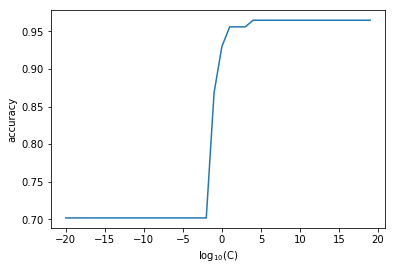

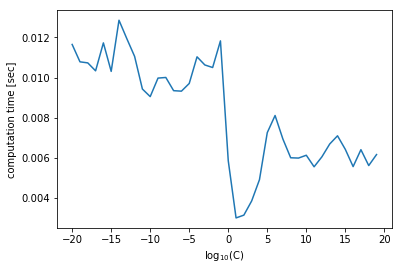

In [82]:
plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$\log_{10}$(C)");
plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$\log_{10}$(C)");

In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [84]:
clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.93859649122807021

In [86]:
clf.C = 100
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96491228070175439

In [87]:
C_range_exp = np.arange(-20., 20.)
C_range = 10 ** C_range_exp
scores = []
comp_time = []

for C in C_range:
    clf.C = C
    
    st = time.time()
    clf.fit(X_train, y_train)
    comp_time.append(time.time() - st)
    
    score = clf.score(X_test, y_test)
    print(C, score)
    scores.append(score)

1e-20 0.298245614035
1e-19 0.298245614035
1e-18 0.298245614035
1e-17 0.298245614035
1e-16 0.298245614035
1e-15 0.894736842105
1e-14 0.894736842105
1e-13 0.894736842105
1e-12 0.894736842105
1e-11 0.894736842105
1e-10 0.894736842105
1e-09 0.894736842105
1e-08 0.894736842105
1e-07 0.894736842105
1e-06 0.894736842105
1e-05 0.894736842105
0.0001 0.894736842105
0.001 0.894736842105
0.01 0.894736842105
0.1 0.921052631579
1.0 0.938596491228
10.0 0.956140350877
100.0 0.964912280702
1000.0 0.964912280702
10000.0 0.964912280702
100000.0 0.964912280702
1000000.0 0.947368421053
10000000.0 0.947368421053
100000000.0 0.947368421053
1000000000.0 0.947368421053
10000000000.0 0.947368421053
100000000000.0 0.947368421053
1e+12 0.947368421053
1e+13 0.947368421053
1e+14 0.947368421053
1e+15 0.947368421053
1e+16 0.947368421053
1e+17 0.947368421053
1e+18 0.947368421053
1e+19 0.947368421053


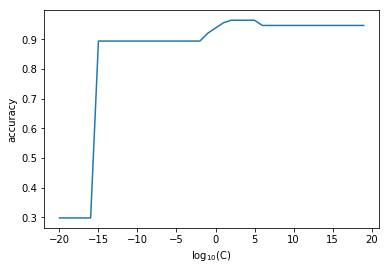

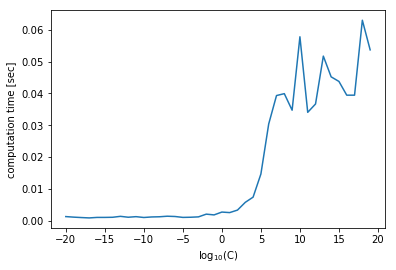

In [88]:
plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$\log_{10}$(C)");
plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$\log_{10}$(C)");

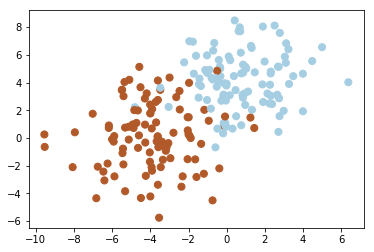

In [91]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,
                 n_features=2,
                 centers=2,
                 cluster_std=2,
                 random_state=3
                 )
plt.scatter(X[:,0], X[:,1], c=y, s=50)

In [ ]:
# 省略

# 正則化パラメータと過学習

In [92]:
# 省略